<a href="https://colab.research.google.com/github/mashumabduljabbar/data-analytics-portfolio/blob/main/2024_08_05_Latihan_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

**Pertanyaan Bisnis untuk Eksplorasi Data**

Di proyek ini, kita bekerja dengan perusahaan online fashion bernama Dicoding Collection (DiCo). Untuk mengevaluasi performa penjualan dan memahami pelanggan, kita perlu menjawab beberapa pertanyaan bisnis berikut:

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

**Melakukan Eksplorasi Data**

Eksplorasi Data (EDA) adalah langkah awal dalam analisis data yang bertujuan untuk memahami struktur, pola, dan anomali dalam dataset. Berikut adalah tahapan dalam EDA:

1. **Memahami Data**
   - **Deskripsi Umum**: Tinjau deskripsi dataset, termasuk jumlah baris dan kolom, tipe data, dan statistik dasar.
   - **Visualisasi Awal**: Buat visualisasi sederhana untuk mendapatkan gambaran umum tentang distribusi data.

2. **Pembersihan Data**
   - **Menangani Missing Values**: Identifikasi dan tangani missing values.
   - **Mengatasi Outliers**: Identifikasi dan tangani outliers yang mungkin mempengaruhi analisis.
   - **Menangani Duplicate Data**: Hapus baris duplikat yang dapat mempengaruhi hasil analisis.

3. **Analisis Data**
   - **Analisis Deskriptif**: Hitung statistik deskriptif seperti mean, median, dan mode untuk memahami karakteristik data.
   - **Visualisasi Data**: Gunakan grafik seperti histogram, boxplot, dan scatter plot untuk memahami distribusi dan hubungan antar variabel.

4. **Menjawab Pertanyaan Bisnis**
   - **Evaluasi Performa Penjualan**: Analisis data penjualan untuk mengevaluasi performa dan revenue.
   - **Analisis Produk**: Identifikasi produk yang paling banyak dan sedikit terjual.
   - **Demografi Pelanggan**: Tinjau data pelanggan untuk memahami demografi.
   - **Frekuensi dan Pengeluaran**: Analisis frekuensi pembelian dan total pengeluaran pelanggan.

# 1.Library

In [3]:
import numpy as np  # Mengimpor pustaka NumPy untuk komputasi numerik
import pandas as pd  # Mengimpor pustaka Pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor modul pyplot dari Matplotlib untuk visualisasi data
import seaborn as sns  # Mengimpor pustaka Seaborn untuk visualisasi data statistik yang lebih canggih
from google.colab import files # Mengimpor modul files dari Google Colab untuk mengelola file, seperti mengunduh file dari lingkungan Colab

# 2.Dataset

In [6]:
# Membaca data dari file CSV yang dihosting di URL
customers_df = pd.read_csv("https://raw.githubusercontent.com/mashumabduljabbar/data-analytics-portfolio/main/data_clean/customers.csv")

# Menampilkan informasi tentang DataFrame
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1001 non-null   int64 
 1   customer_name  1001 non-null   object
 2   gender         1001 non-null   object
 3   age            1001 non-null   int64 
 4   home_address   1001 non-null   object
 5   zip_code       1001 non-null   int64 
 6   city           1001 non-null   object
 7   state          1001 non-null   object
 8   country        1001 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.5+ KB


In [22]:
# Membaca data dari file CSV yang dihosting di URL
orders_df = pd.read_csv("https://raw.githubusercontent.com/mashumabduljabbar/data-analytics-portfolio/main/data_clean/orders.csv")

# Daftar kolom yang berisi data tanggal
datetime_columns = ["order_date", "delivery_date"]

# Mengubah tipe data kolom-kolom yang berisi tanggal menjadi datetime
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# Menampilkan informasi tentang DataFrame
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [10]:
# Membaca data dari file CSV yang dihosting di URL
product_df = pd.read_csv("https://raw.githubusercontent.com/mashumabduljabbar/data-analytics-portfolio/main/data_clean/product.csv")

# Menampilkan informasi tentang DataFrame
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


In [11]:
# Membaca data dari file CSV yang dihosting di URL
sales_df = pd.read_csv("https://raw.githubusercontent.com/mashumabduljabbar/data-analytics-portfolio/main/data_clean/sales.csv")

# Menampilkan informasi tentang DataFrame
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


# 3.Eksplorasi Data

## 3.1 Eksplorasi Data customers_df

Kita akan memulai eksplorasi data dengan dataset `customers_df`, yang berisi informasi terkait pelanggan seperti `customer_id`, `customer_name`, `gender`, `age`, `home_address`, `zip_code`, `city`, `state`, dan `country`.

Untuk memahami data secara keseluruhan, kita akan melihat rangkuman parameter statistik menggunakan method `describe()`. Method ini memberikan statistik deskriptif seperti mean, median, standard deviation, min, dan max untuk kolom numerik dalam dataset. Ini membantu kita mendapatkan gambaran umum tentang distribusi dan rentang nilai dalam data pelanggan.

Mari kita mulai dengan menjalankan method `describe()` pada dataset `customers_df`.

### 3.1.1 Rangkuman Statistik

In [12]:
# Menampilkan rangkuman statistik dari dataset customers_df untuk semua kolom, baik numerik maupun kategorikal.
# - 'include="all"' memastikan bahwa statistik untuk kolom numerik dan kategorikal ditampilkan.
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, berikut adalah informasi yang diperoleh dari dataset `customers_df`:

- **Jumlah Pelanggan**: 1001 orang
- **Rentang Umur**: 20 hingga 80 tahun
- **Rata-Rata Umur**: 49.87 tahun
- **Standar Deviasi Umur**: 17.64 tahun

Informasi ini menunjukkan bahwa segmentasi pelanggan mencakup berbagai kelompok usia, mulai dari remaja hingga lanjut usia, memberikan gambaran bahwa basis pelanggan yang dimiliki cukup luas.


### 3.1.2 Analisis Demografi Pelanggan


Demografi pelanggan berdasarkan jenis kelamin (`gender`). Untuk analisis ini, kita akan menggunakan method `groupby()` diikuti dengan method `agg()`.

In [13]:
# Mengelompokkan data berdasarkan jenis kelamin dan menghitung jumlah pelanggan serta statistik umur
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Kode ini akan menghasilkan sebuah pivot table yang menunjukkan jumlah pelanggan berdasarkan jenis kelamin serta statistik umur mereka. Pivot table ini akan memberikan gambaran tentang distribusi jenis kelamin dan rentang umur pelanggan.

Dari pivot table tersebut, terlihat bahwa pelanggan didominasi oleh kategori "prefer not to say", dan distribusi umur pelanggan berkisar antara 20 hingga 80 tahun.

Selanjutnya, kita akan menganalisis distribusi jumlah pelanggan berdasarkan kota (city) dan negara bagian (state). Kita juga akan mengurutkan hasilnya menggunakan method sort_values() dalam urutan menurun untuk memudahkan visualisasi.

In [16]:
# Mengelompokkan data berdasarkan kota dan menghitung jumlah pelanggan, lalu mengurutkan hasilnya
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

,customer_id
city,
East Aidan,3
East Sophia,3
New Ava,3
West Jackfort,2
Corkeryshire,2
Ryanberg,2
South Hannah,2
Feeneymouth,2
Lake Jesse,2


In [17]:
# Mengelompokkan data berdasarkan negara bagian dan menghitung jumlah pelanggan, lalu mengurutkan hasilnya
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

,customer_id
state,
South Australia,139
Queensland,134
New South Wales,132
Northern Territory,125
Western Australia,124
Australian Capital Territory,121
Victoria,121
Tasmania,104


Hasil dari kode ini akan memberikan pivot table yang menunjukkan distribusi pelanggan di setiap kota dan negara bagian. Berdasarkan hasil analisis, terlihat bahwa pelanggan tersebar cukup merata di berbagai kota dan negara bagian, dengan konsentrasi pelanggan tertinggi di kota East Aidan, East Sophia, dan New Ava serta negara bagian South Australia.

## 3.2 Eksplorasi Data orders_df

Data kedua yang akan kita eksplor adalah `orders_df`, yang mengandung informasi terkait sebuah order, seperti `order_id`, `customer_id`, `order_date`, dan `delivery_date`. Kita akan membuat kolom baru untuk menghitung waktu pengiriman tiap order. Prosesnya melibatkan menghitung selisih antara `delivery_date` dan `order_date`, menyimpannya sebagai `delivery_time`, dan mengubahnya ke dalam satuan hari. Berikut adalah contoh kode untuk melakukannya.

In [23]:
# Menghitung waktu pengiriman dengan selisih antara delivery_date dan order_date
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]

# Menghitung jumlah detik dari delivery_time dan mengubahnya ke dalam satuan hari
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time / 86400)

In [24]:
# Menampilkan rangkuman statistik dari dataset orders_df untuk semua kolom
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman adalah 14 hari dengan nilai maksimum 27 hari dan nilai minimum 1 hari.

Dengan informasi ini, kita telah memperoleh gambaran yang lebih jelas mengenai data orders_df. Selanjutnya, kita akan mencoba mencari informasi lain dengan menghubungkan data ini dengan data customers_df.

## 3.3 Eksplorasi Data orders_df dan customers_df

Jika Anda perhatikan, pada data `orders_df` terdapat kolom yang berisi informasi terkait `customer_id` pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Kita akan membuat kolom baru bernama `status` pada data `customers_df`. Kolom ini akan memiliki nilai "Active" untuk pelanggan yang pernah melakukan order setidaknya sekali dan "Non Active" untuk pelanggan yang belum pernah melakukan order sama sekali. Berikut adalah kode untuk melakukannya:

In [25]:
# Mendapatkan daftar customer_id yang pernah melakukan order
customer_id_in_orders_df = orders_df.customer_id.tolist()

# Menambahkan kolom status ke customers_df
customers_df["status"] = customers_df["customer_id"].apply(
    lambda x: "Active" if x in customer_id_in_orders_df else "Non Active"
)

# Menampilkan 5 sampel data dari customers_df
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
672,673,fulan 673,Male,59,82 Hayden DriveSuite 289,426,New Angelina,South Australia,Australia,Active
117,118,fulan 118,Male,57,164 Fisher RidgeSuite 516,9963,South Cameron,Australian Capital Territory,Australia,Active
776,777,fulan 777,Female,50,7709 Ellie GroveSuite 872,2616,South Callum,New South Wales,Australia,Non Active
7,8,fulan 8,Prefer not to say,75,383 Muller SummitSuite 809,7681,Samside,Northern Territory,Australia,Non Active
709,710,fulan 710,Male,60,606 Lucy ParadeSuite 217,1666,Kulasville,New South Wales,Australia,Active


Untuk memperoleh informasi terkait jumlah pelanggan yang berstatus "Active" dan "Non Active", kita bisa menggunakan pivot table. Berikut contoh kode untuk membuat pivot table menggunakan kolom status:

In [26]:
# Membuat pivot table untuk status pelanggan
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,617
Non Active,384


Seperti yang terlihat pada pivot table di atas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar buruk karena hampir 30% pelanggan kita belum pernah melakukan order sebelumnya.

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge. Kita melakukan proses merge dengan metode "left". Metode ini memungkinkan kita untuk mengambil semua nilai dari tabel kiri serta nilai yang bersesuaian dari tabel kanan. Berikut contoh kode untuk melakukan merge terhadap data orders_df dan customers_df:

In [28]:
# Menggabungkan orders_df dan customers_df
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# Menampilkan 5 baris pertama dari hasil merge
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


### 3.3.1 Jumlah order berdasarkan kota

In [29]:
# Membuat pivot table untuk jumlah order berdasarkan kota
top_cities_orders = orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

# Menampilkan hasil
top_cities_orders

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


Berdasarkan hasil tersebut, dapat diketahui bahwa Jordanside dan New Ava adalah dua kota dengan jumlah order terbanyak.

### 3.3.2 Jumlah order berdasarkan state

In [30]:
# Membuat pivot table untuk jumlah order berdasarkan negara bagian
orders_per_state = orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

# Menampilkan hasil
orders_per_state

,order_id
state,
South Australia,148
Queensland,139
Western Australia,130
New South Wales,129
Australian Capital Territory,118
Victoria,118
Tasmania,112
Northern Territory,106


Berdasarkan pivot table tersebut, dapat diketahui bahwa South Australia adalah state dengan jumlah order terbanyak.

### 3.3.3 Jumlah order berdasarkan gender

In [31]:
# Membuat pivot table untuk jumlah order berdasarkan gender
orders_per_gender = orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

# Menampilkan hasil
orders_per_gender

,order_id
gender,
Prefer not to say,725
Female,139
Male,136


Berdasarkan hasil tersebut, terlihat bahwa sebagian besar order dilakukan oleh pelanggan yang memilih opsi "prefer not to say" untuk jenis kelamin mereka. Hal ini sesuai dengan proporsi pelanggan yang dominan dalam kelompok gender tersebut.

### 3.3.4 Jumlah order berdasarkan kelompok usia

In [32]:
# Membuat kolom baru 'age_group' berdasarkan usia
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))

# Membuat pivot table untuk jumlah order berdasarkan kelompok usia
orders_per_age_group = orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

# Menampilkan hasil
orders_per_age_group

,order_id
age_group,
Adults,681
Seniors,226
Youth,93


Berdasarkan hasil tersebut, dapat disimpulkan bahwa pelanggan dengan kelompok usia Adults merupakan yang paling banyak melakukan order.

## 3.4 Eksplorasi Data product_df dan sales_df

Pada tahap ini, kita akan mengeksplorasi data dari product_df dan sales_df. Pertama-tama, kita dapat melihat rangkuman parameter statistik dari kedua dataset menggunakan method describe().

In [34]:
# Menampilkan rangkuman parameter statistik untuk data produk
product_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [35]:
# Menampilkan rangkuman parameter statistik untuk data penjualan
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Berdasarkan hasil tersebut, kita dapat melihat bahwa harga produk berkisar antara 90 hingga 119 dolar. Selain itu, data menunjukkan bahwa dalam setiap transaksi, pelanggan umumnya membeli hingga tiga item dari satu jenis produk dengan total harga sekitar 357 dolar.

Untuk mengetahui produk dengan harga termahal dan terendah, jalankan kode berikut:

### 3.4.1 Mengurutkan Produk Berdasarkan Harga

In [36]:
# Mengurutkan produk berdasarkan harga dari yang termahal ke termurah
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
698,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
665,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
692,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
693,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
694,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1219,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1220,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1221,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1222,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


Hasil dari kode ini akan menunjukkan bahwa produk termahal adalah jaket Parka, sedangkan yang termurah adalah Bomber.

Selanjutnya, kita akan menggunakan pivot table untuk mengeksplorasi informasi produk berdasarkan tipe dan nama produk. Berikut adalah kode untuk membuat pivot table tersebut:

### 3.4.2 Membuat Pivot Table Berdasarkan Tipe Produk

In [37]:
# Membuat pivot table berdasarkan tipe produk
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",    # Menghitung jumlah produk unik
    "quantity": "sum",          # Menjumlahkan kuantitas produk
    "price":  ["min", "max"]    # Menampilkan harga minimum dan maksimum
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

Pivot table yang dihasilkan menunjukkan bahwa Trousers adalah tipe produk yang paling laris, sementara Jacket memberikan kontribusi revenue terbesar.

### 3.4.3 Membuat Pivot Table Berdasarkan Nama Produk

In [38]:
# Membuat pivot table berdasarkan nama produk
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",    # Menghitung jumlah produk unik
    "quantity": "sum",          # Menjumlahkan kuantitas produk
    "price": ["min", "max"]     # Menampilkan harga minimum dan maksimum
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Hasil pivot table ini menunjukkan bahwa produk Denim adalah yang paling laris dan juga menyumbang revenue terbesar untuk perusahaan.

### 3.4.4 Membuat Pivot Table Berdasarkan Tipe Produk dan Penjualan

In [40]:
# Menggabungkan data penjualan dan produk berdasarkan product_id
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [41]:
# Membuat pivot table berdasarkan tipe produk dalam data penjualan
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",      # Menghitung jumlah penjualan unik
    "quantity_x": "sum",        # Menjumlahkan kuantitas produk terjual
    "total_price": "sum"        # Menjumlahkan total harga dari penjualan
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Berdasarkan pivot table yang dihasilkan, tipe produk Trousers merupakan yang paling banyak terjual. Namun, jika kita lihat dari segi pendapatan, tipe produk Jacket adalah yang memberikan kontribusi revenue terbesar bagi perusahaan.

### 3.4.5 Membuat Pivot Table Berdasarkan Nama Produk dan Penjualan

In [42]:
# Membuat pivot table berdasarkan nama produk dalam data penjualan
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",      # Menghitung jumlah penjualan unik
    "quantity_x": "sum",        # Menjumlahkan kuantitas produk terjual
    "total_price": "sum"        # Menjumlahkan total harga dari penjualan
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


Berdasarkan pivot table tersebut, dapat diketahui bahwa produk Denim adalah yang paling banyak terjual dan juga yang memberikan kontribusi terbesar terhadap pendapatan perusahaan.

## 3.5 Eksplorasi Data all_df

Untuk menggabungkan semua informasi dari keempat tabel yang dimiliki, kita membuat DataFrame baru bernama all_df. Berikut adalah kode yang digunakan untuk penggabungan:

In [43]:
# Menggabungkan DataFrame sales_product_df dan orders_customers_df berdasarkan order_id
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menampilkan lima baris pertama dari all_df
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


### 3.5.1 Preferensi Pembelian Berdasarkan State dan Tipe Produk

In [44]:
# Membuat pivot table berdasarkan state dan tipe produk
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",         # Menjumlahkan kuantitas produk
    "total_price": "sum"         # Menjumlahkan total harga dari penjualan
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Pivot table ini memberikan wawasan tentang preferensi produk berdasarkan lokasi negara bagian pelanggan. Terlihat bahwa tipe produk Jacket paling banyak terjual di negara bagian Queensland, South Australia, dan New South Wales. Informasi tentang tipe produk lainnya dapat dilihat pada pivot table tersebut.

### 3.5.2 Preferensi Pembelian Berdasarkan Gender dan Tipe Produk

In [46]:
# Membuat pivot table berdasarkan gender dan tipe produk
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",         # Menjumlahkan kuantitas produk
    "total_price": "sum"         # Menjumlahkan total harga dari penjualan
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [47]:
# Membuat pivot table berdasarkan kelompok usia dan tipe produk
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",         # Menjumlahkan kuantitas produk
    "total_price": "sum"         # Menjumlahkan total harga dari penjualan
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

Pivot table di atas memberikan wawasan tentang preferensi tipe produk pelanggan berdasarkan gender dan kelompok usia. Informasi ini akan sangat berguna untuk menjawab pertanyaan mengenai preferensi produk berdasarkan demografi pengguna.

# 4.Menjawab Pertanyaan Bisnis

## 4.1 Performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir

In [56]:
# Menggabungkan sales_df dengan orders_df untuk mendapatkan order_date
sales_orders_df = pd.merge(
    left=sales_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Pastikan order_date adalah tipe datetime
sales_product_df['order_date'] = pd.to_datetime(sales_product_df['order_date'])

# Tambahkan kolom bulan dan tahun
sales_product_df['month'] = sales_product_df['order_date'].dt.to_period('M')

# Menghitung total penjualan dan revenue per bulan
monthly_performance = sales_product_df.groupby('month').agg({
    'quantity_x': 'sum',   # Total quantity sold per month
    'total_price': 'sum'   # Total revenue per month
}).reset_index()

print("Monthly Performance:\n", monthly_performance)

Monthly Performance:
      month  quantity_x  total_price
0  2021-01        1143       119333
1  2021-02         920        95080
2  2021-03        1264       131364
3  2021-04         944        97530
4  2021-05         829        85597
5  2021-06         982       101458
6  2021-07        1122       116081
7  2021-08        1008       104565
8  2021-09         936        96526
9  2021-10         814        84266


## 4.2 Produk yang paling banyak dan paling sedikit terjual

In [58]:
# Menggabungkan sales_orders_df dengan product_df untuk mendapatkan informasi produk
sales_product_df = pd.merge(
    left=sales_orders_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Mengelompokkan data berdasarkan nama produk
product_sales = sales_product_df.groupby('product_name').agg({
    'quantity_x': 'sum'
}).sort_values(by='quantity_x', ascending=False).reset_index()

# Menampilkan produk yang paling banyak dan paling sedikit terjual
most_sold_product = product_sales.head(1)
least_sold_product = product_sales.tail(1)

print("Most Sold Product:\n", most_sold_product)
print("Least Sold Product:\n", least_sold_product)

Most Sold Product:
   product_name  quantity_x
0        Denim         527
Least Sold Product:
        product_name  quantity_x
34  Mandarin Collar         236


## 4.3 Demografi pelanggan yang kita miliki

In [62]:
# Asumsi orders_customers_df sudah memiliki kolom 'age_group'
# Gabungkan sales_product_df dengan orders_customers_df
sales_orders_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df[['order_id', 'age_group']],  # Ambil hanya kolom yang diperlukan
    how='left',
    left_on='order_id',
    right_on='order_id'
)

# Analisis demografi pelanggan
customer_demographics = sales_orders_df.groupby('age_group').agg({
    'quantity_x': 'sum',   # Total quantity sold per age group
    'total_price': 'sum'   # Total revenue per age group
}).reset_index()

print("Customer Demographics:\n", customer_demographics)

Customer Demographics:
   age_group  quantity_x  total_price
0    Adults        6789       704107
1   Seniors        2276       235407
2     Youth         897        92286


## 4.4 Kapan terakhir pelanggan melakukan transaksi

In [71]:
# Pastikan 'last_transaction_date' adalah tipe datetime
last_transaction['last_transaction_date'] = pd.to_datetime(last_transaction['last_transaction_date'])

# Hitung tanggal hari ini
today = pd.to_datetime('today')

# Hitung selisih hari sejak transaksi terakhir
last_transaction['days_since_last_transaction'] = (today - last_transaction['last_transaction_date']).dt.days

print("Days Since Last Transaction:\n", last_transaction)

Days Since Last Transaction:
      customer_id last_transaction_date  days_since_last_transaction
0              1            2021-04-04                         1219
1              7            2021-05-21                         1172
2             10            2021-03-09                         1245
3             11            2021-05-28                         1165
4             12            2021-06-19                         1143
..           ...                   ...                          ...
611          994            2021-01-12                         1301
612          995            2021-08-02                         1099
613          996            2021-09-03                         1067
614          998            2021-07-19                         1113
615         1000            2021-10-11                         1029

[616 rows x 3 columns]


In [72]:
# Definisikan fungsi untuk mengelompokkan berdasarkan rentang waktu
def categorize_days(days):
    if days <= 30:
        return '0-30 days'
    elif 30 < days <= 60:
        return '31-60 days'
    else:
        return '61+ days'

# Terapkan fungsi ke kolom 'days_since_last_transaction'
last_transaction['transaction_category'] = last_transaction['days_since_last_transaction'].apply(categorize_days)

# Hitung jumlah pelanggan dalam setiap kategori
transaction_summary = last_transaction['transaction_category'].value_counts().reset_index()
transaction_summary.columns = ['Transaction_Category', 'Customer_Count']

print("Transaction Summary by Category:\n", transaction_summary)

Transaction Summary by Category:
   Transaction_Category  Customer_Count
0             61+ days             616


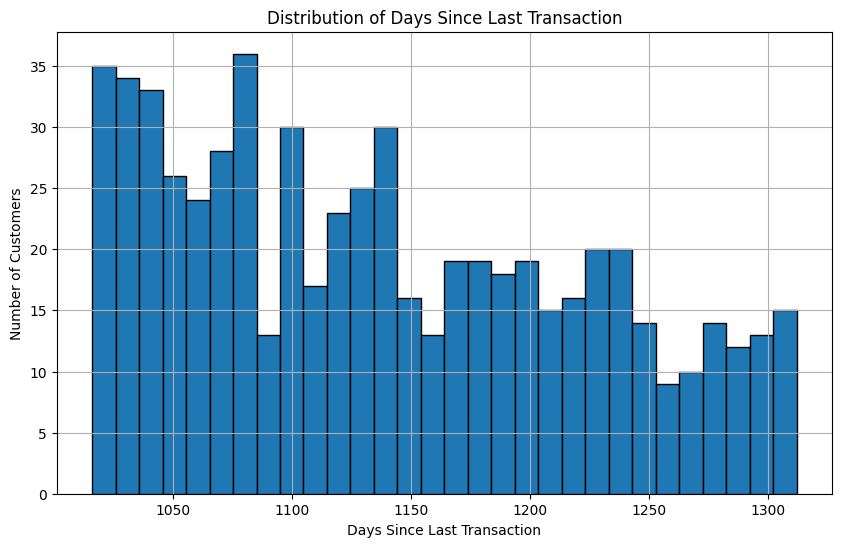

<Figure size 800x800 with 0 Axes>

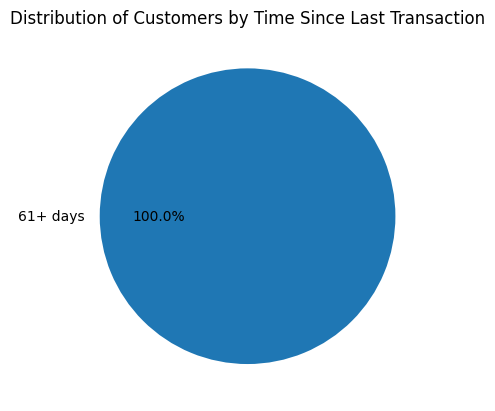

In [75]:
# Plot histogram dari days_since_last_transaction
plt.figure(figsize=(10, 6))
plt.hist(last_transaction['days_since_last_transaction'], bins=30, edgecolor='k')
plt.title('Distribution of Days Since Last Transaction')
plt.xlabel('Days Since Last Transaction')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Plot pie chart untuk kategori transaksi
plt.figure(figsize=(8, 8))
transaction_summary.set_index('Transaction_Category').plot.pie(y='Customer_Count', autopct='%1.1f%%', legend=False)
plt.title('Distribution of Customers by Time Since Last Transaction')
plt.ylabel('')
plt.show()

## 4.5 Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir

In [76]:
# Menghitung jumlah transaksi per pelanggan
purchase_frequency = sales_product_df.groupby('customer_id').size().reset_index(name='purchase_count')

print("Purchase Frequency:\n", purchase_frequency)

Purchase Frequency:
      customer_id  purchase_count
0              1               8
1              7               5
2             10               1
3             11               2
4             12               8
..           ...             ...
611          994               7
612          995              10
613          996              13
614          998              21
615         1000               6

[616 rows x 2 columns]


## 4.6 Uang yang dihabiskan pelanggan dalam beberapa bulan terakhir

In [77]:
# Menghitung total pengeluaran per pelanggan
total_spent_per_customer = sales_product_df.groupby('customer_id').agg({
    'total_price': 'sum'
}).reset_index()

print("Total Spent Per Customer:\n", total_spent_per_customer)

Total Spent Per Customer:
      customer_id  total_price
0              1         1641
1              7         1017
2             10          270
3             11          382
4             12         1551
..           ...          ...
611          994         1716
612          995         2140
613          996         3045
614          998         4415
615         1000         1483

[616 rows x 2 columns]
